In [ ]:
from google.colab import files
uploades = files.upload()


Saving Timeseries_Data.csv to Timeseries_Data.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Timeseries_Data.csv')

df.head()

,Unnamed: 0,date,hour,hourly_polarity,datetime,polarity_diff
0,1,2022-02-24,7,0.023769,2022-02-2407,0.298069
1,2,2022-02-24,8,0.151148,2022-02-2408,0.127379
2,3,2022-02-24,9,0.056736,2022-02-2409,-0.094411
3,4,2022-02-24,10,0.411610,2022-02-2410,0.354874
4,5,2022-02-24,11,0.406074,2022-02-2411,-0.005536


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy as np
import pmdarima as pm


forecast = pm.auto_arima(df['hourly_polarity'], start_p=1, start_q=1, max_p=6, max_q=6, m=12,
                       start_P=0, seasonal=True, trace=True,
                       n_jobs=-1,  # We can run this in parallel by controlling this option
                       error_action='ignore',  # don't want to know if an order does not work
                       suppress_warnings=True,  # don't want convergence warnings
                       stepwise=False, random=True, random_state=42,  # we can fit a random search (not exhaustive)
                       n_fits=15)
                                    
                                       
forecast.summary()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best model:  ARIMA(4,1,1)(0,0,0)[12] intercept
Total fit time: 330.980 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10197
Model:               SARIMAX(4, 1, 1)   Log Likelihood                  56.178
Date:                Fri, 26 May 2023   AIC                            -98.356
Time:                        19:15:15   BIC                            -47.748
Sample:                             0   HQIC                           -81.242
                              - 10197                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -1.04e-05      0.000     -0.093      0.926      -0.000       0.000
ar.L1          0.1525      0.008     18.140      0.000       0.136       0.169
ar.L2          0.0586      0.008      6.958      0.000       0.042       0.075
ar.L3          0.0732      0.009      8.396      0.000       0.056       0.090
ar.L4          0.0151      0.008      1.788      0.074      -0.001       0.032
ma.L1         -0.9538      0.004   -225.768      0.000      -0.962      -0.946
sigma2         0.0579      0.001     95.695      0.000       0.057       0.059
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):              1546.24
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               2.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
def forecasting(period):
  if period == 'week':
    long = 7*24
  elif period == 'month':
    long = 7*24*4
  elif period == 'three_month':
    long = 7*24*4*3



  predict = forecast.predict(long)
  import matplotlib.pyplot as plt
  plt.plot(predict)
  plt.grid()
  plt.title(f'ARIMA {period} forecast')
  plt.xlabel('hour')
  plt.ylabel('sentiment')
  plt.show()

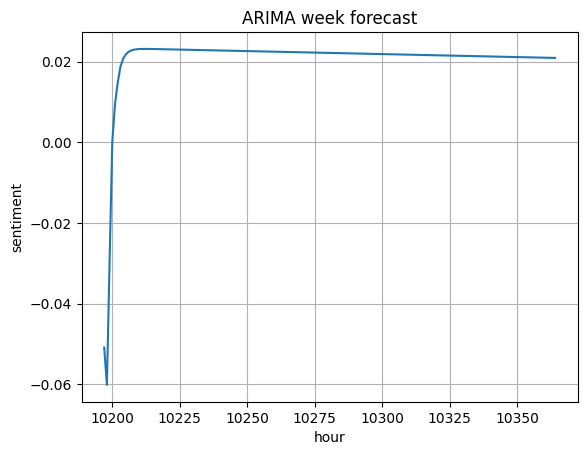

In [ ]:
forecasting('week')

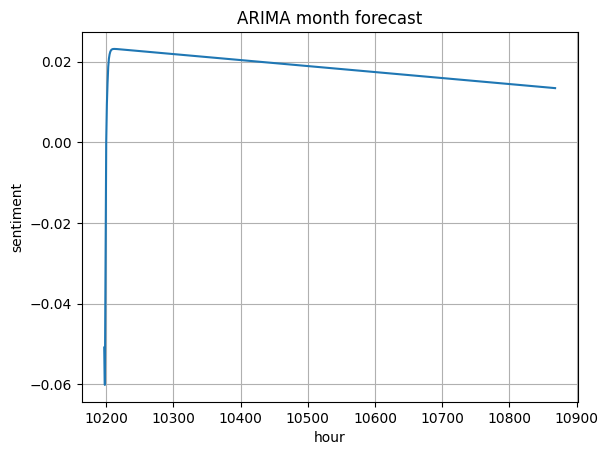

In [ ]:
forecasting('month')

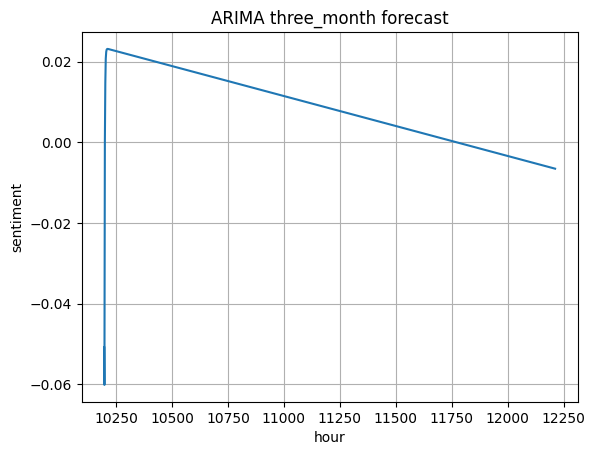

In [ ]:
forecasting('three_month')

In [ ]:
forecast.params()

intercept   -0.000010
ar.L1        0.152488
ar.L2        0.058562
ar.L3        0.073163
ar.L4        0.015078
ma.L1       -0.953797
sigma2       0.057867
dtype: float64

ValueError: ignored

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
df.datetime = df['date'].astype(str) + " " + df['hour'].astype(str) + ":00"
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M')
df = df.filter(['datetime', 'hourly_polarity'])
timeseries = df.rename(columns = {'datetime':'ds', 'hourly_polarity': 'y'})


In [ ]:
df.head()

,datetime,hourly_polarity
0,2022-02-24 07:00:00,0.023769
1,2022-02-24 08:00:00,0.151148
2,2022-02-24 09:00:00,0.056736
3,2022-02-24 10:00:00,0.411610
4,2022-02-24 11:00:00,0.406074


In [ ]:
model = Prophet(weekly_seasonality = True, yearly_seasonality = False)
#model.add_seasonality(name = 'monthly', period = 144, fourier_order=5)
model.fit(timeseries)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1srcxxuq/7wuhrpl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1srcxxuq/n2ls56qu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93498', 'data', 'file=/tmp/tmp1srcxxuq/7wuhrpl9.json', 'init=/tmp/tmp1srcxxuq/n2ls56qu.json', 'output', 'file=/tmp/tmp1srcxxuq/prophet_modelf0p93qoc/prophet_model-20230526195353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:53:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:53:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
week = model.make_future_dataframe(periods = 7*24, freq = 'H')
week_forecast = model.predict(week)
#model.plot(week_forecast)
week_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-24 07:00:00,0.115685,-0.160866,0.494554,0.115685,0.115685,0.048280,0.048280,0.048280,0.026021,0.026021,0.026021,0.022258,0.022258,0.022258,0.0,0.0,0.0,0.163965
1,2022-02-24 08:00:00,0.115663,-0.169893,0.492899,0.115663,0.115663,0.040539,0.040539,0.040539,0.019531,0.019531,0.019531,0.021008,0.021008,0.021008,0.0,0.0,0.0,0.156201
2,2022-02-24 09:00:00,0.115640,-0.164668,0.487924,0.115640,0.115640,0.039047,0.039047,0.039047,0.019348,0.019348,0.019348,0.019699,0.019699,0.019699,0.0,0.0,0.0,0.154687
3,2022-02-24 10:00:00,0.115617,-0.141222,0.495636,0.115617,0.115617,0.047281,0.047281,0.047281,0.028931,0.028931,0.028931,0.018350,0.018350,0.018350,0.0,0.0,0.0,0.162898
4,2022-02-24 11:00:00,0.115594,-0.165722,0.490467,0.115594,0.115594,0.055761,0.055761,0.055761,0.038784,0.038784,0.038784,0.016978,0.016978,0.016978,0.0,0.0,0.0,0.171355


Text(67.34722222222221, 0.5, 'Sentiment')

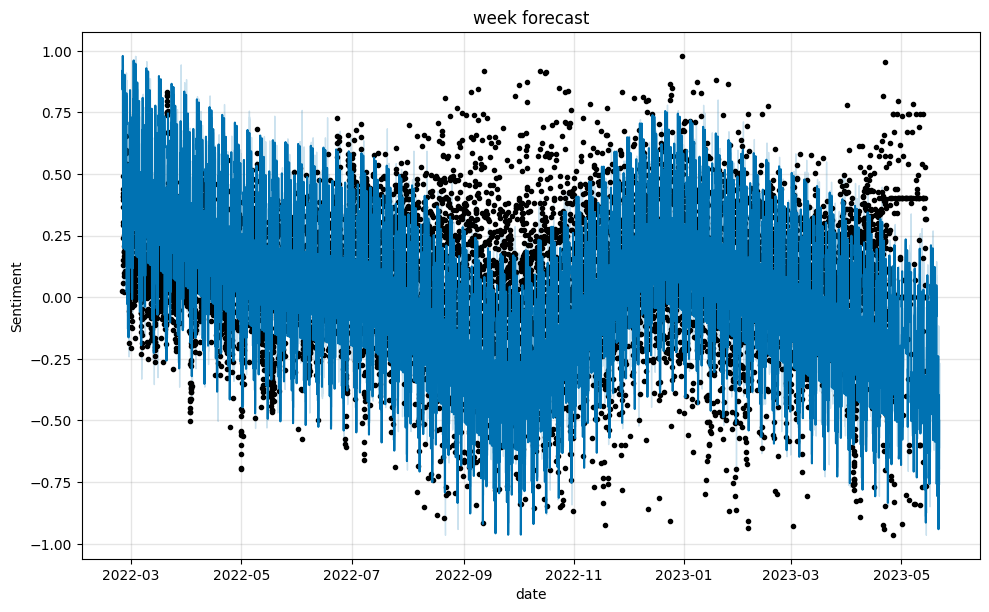

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
def scale_dataframe(df):
    df_scaled = df

    date = df_scaled['ds']

    df_scaled = df_scaled.drop(columns=['ds'])

    # Apply MinMaxScaler
    scaler = MinMaxScaler(feature_range=(timeseries['y'].min(),timeseries['y'].max()))
    scaled_values = scaler.fit_transform(df_scaled) 

    # Create a new DataFrame with scaled values
    df_scaled = pd.DataFrame(scaled_values, columns=df_scaled.columns)

    # Add 'ds' column back
    df_scaled = pd.concat([date, df_scaled], axis=1)

    return df_scaled

week_forecast = scale_dataframe(week_forecast)
model.plot(week_forecast)
plt.title('week forecast')
plt.xlabel('date')
plt.ylabel('Sentiment')


Text(67.34722222222221, 0.5, 'Sentiment')

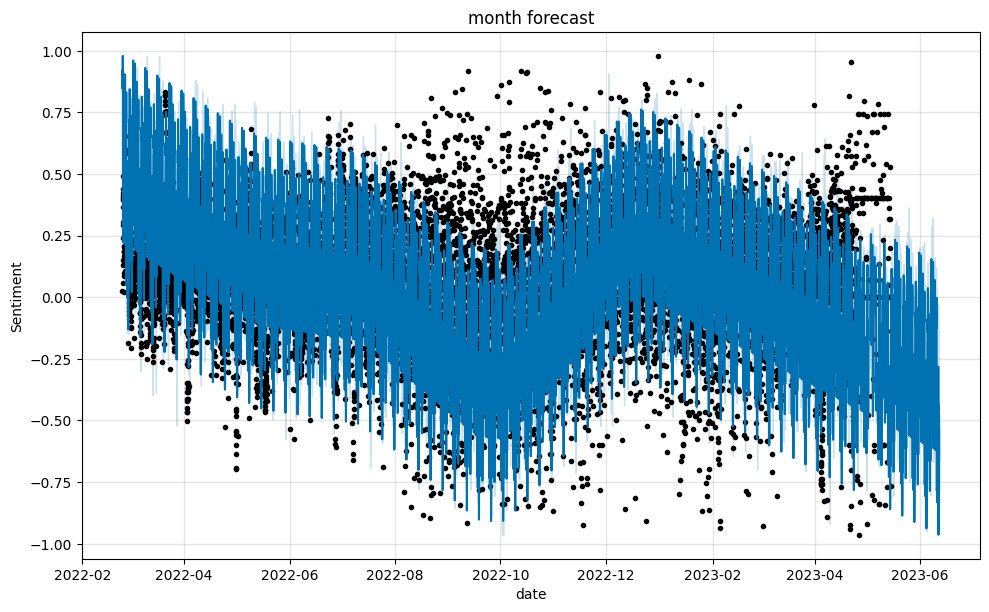

In [ ]:
month = model.make_future_dataframe(periods = 7*24*4, freq = 'H')
month_forecast = model.predict(month)
month_forecast = scale_dataframe(month_forecast)
model.plot(month_forecast)
plt.title('month forecast')
plt.xlabel('date')
plt.ylabel('Sentiment')

Text(67.34722222222221, 0.5, 'Sentiment')

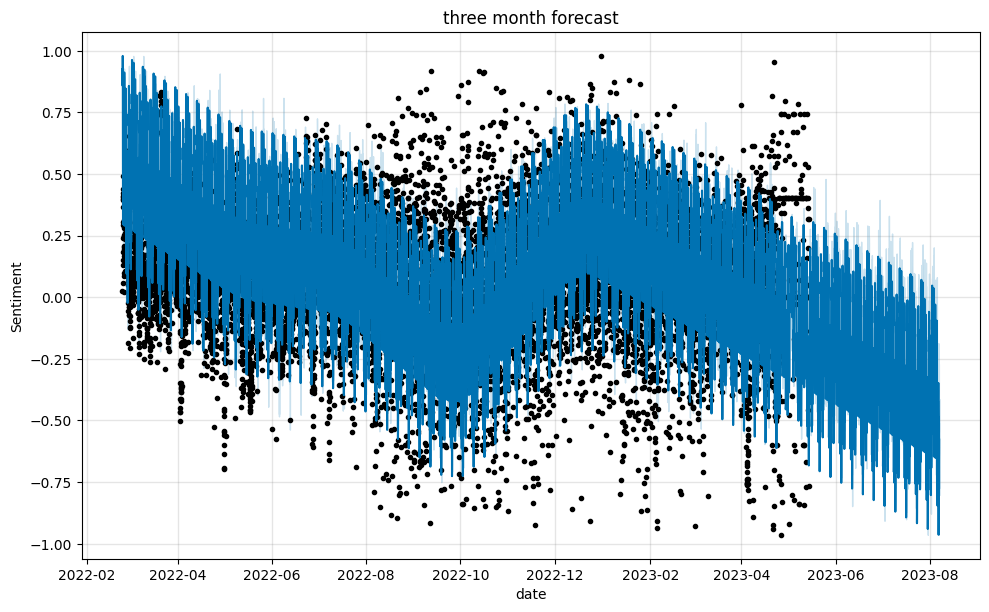

In [ ]:
three_month = model.make_future_dataframe(periods = 24*7*4*3, freq = 'H')
three_month_forecast = model.predict(three_month)
#plt.plot(three_month_forecast.ds, three_month_forecast.yhat)
three_month_forecast = scale_dataframe(three_month_forecast)
model.plot(three_month_forecast)
plt.title('three month forecast')
plt.xlabel('date')
plt.ylabel('Sentiment')

In [ ]:
three_month_forecast.to_csv('three_month.csv')
files.download('three_month.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>